# 1. Reference Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
freq_ref = pd.read_csv("reference data_frequency sweep.dat", sep="\t")
amp_ref = pd.read_csv("referenc data_amplitude sweep.dat", sep="\t")

freq_data_exp = pd.read_csv("20240118_Collagen_sample(frequency sweep).txt", delimiter="\t", header = [0, 1], skiprows=120, engine = "c")
amp_data_exp = pd.read_csv("20240118_Collagen_sample(amplitude sweep).txt", delimiter="\t", header = [0, 1], skiprows=120, engine = "c")
time_data_exp = pd.read_csv("collagen_sample(time sweep).txt", delimiter="\t", header = [0, 1], skiprows=119, engine = "c")

In [18]:
freq_ref.columns = [0,1,2,3,4,5]
amp_ref.columns = [0,1,2,3,4,5]
amp_data_exp

,Storage modulus,Loss modulus,Tan(delta),Angular frequency,Oscillation torque,Step time,Temperature,Raw phase,Oscillation displacement,Complex viscosity,Oscillation strain
,Pa,Pa,Unnamed: 2_level_1,rad/s,µN.m,s,°C,°,rad,Pa.s,%
0,-792.6070,764.0400,-0.963958,6.28319,0.002149,6.10278,36.99,137.06000,6.099450e-08,175.2140,0.000122
1,-267.7990,-379.1160,1.415670,6.28319,0.001547,12.54610,37.00,231.99200,1.023150e-07,73.8735,0.000205
2,94.4684,-210.7290,-2.230680,6.28319,0.000981,25.68760,37.00,-72.61560,1.414470e-07,36.7544,0.000283
3,-273.7970,293.6380,-1.072470,6.28319,0.001748,32.26210,37.00,135.83100,1.320290e-07,63.8979,0.000264
4,367.8060,103.4770,0.281335,6.28319,0.001152,38.81500,37.00,16.95930,1.033540e-07,60.8106,0.000207
5,146.4920,25.3257,0.172882,6.28319,0.001053,45.35510,37.00,12.11330,2.776900e-07,23.6607,0.000555
6,426.3110,1137.4000,2.668010,6.28319,0.002405,58.48400,37.00,70.72000,6.353000e-08,193.3210,0.000127
7,306.3870,73.0275,0.238350,6.28319,0.004523,65.03020,37.01,14.72360,5.010420e-07,50.1290,0.001002
8,253.8260,41.9550,0.165290,6.28319,0.003752,71.61260,37.00,10.54710,5.210710e-07,40.9458,0.001042


In [19]:
freq_ref.drop(2,axis=1,inplace=True)
freq_ref.drop(5,axis=1,inplace=True)
amp_ref.drop(2,axis=1,inplace=True)
amp_ref.drop(5,axis=1,inplace=True)

In [20]:
freq_L, freq_S = freq_ref[0], freq_ref[3]
Lf_ref, Sf_ref = freq_ref[1], freq_ref[4]

str_L, str_S = amp_ref[0], amp_ref[3]
La_ref, Sa_ref = amp_ref[1], amp_ref[4]

freq_exp = freq_data_exp["Frequency"]
strain_exp = amp_data_exp["Oscillation strain"]
Lf_exp , Sf_exp = freq_data_exp["Loss modulus"], freq_data_exp["Storage modulus"]
La_exp, Sa_exp = amp_data_exp["Loss modulus"], amp_data_exp["Storage modulus"]

time_exp =time_data_exp["Step time"]
Lt_exp = time_data_exp["Loss modulus"]
St_exp = time_data_exp["Storage modulus"]


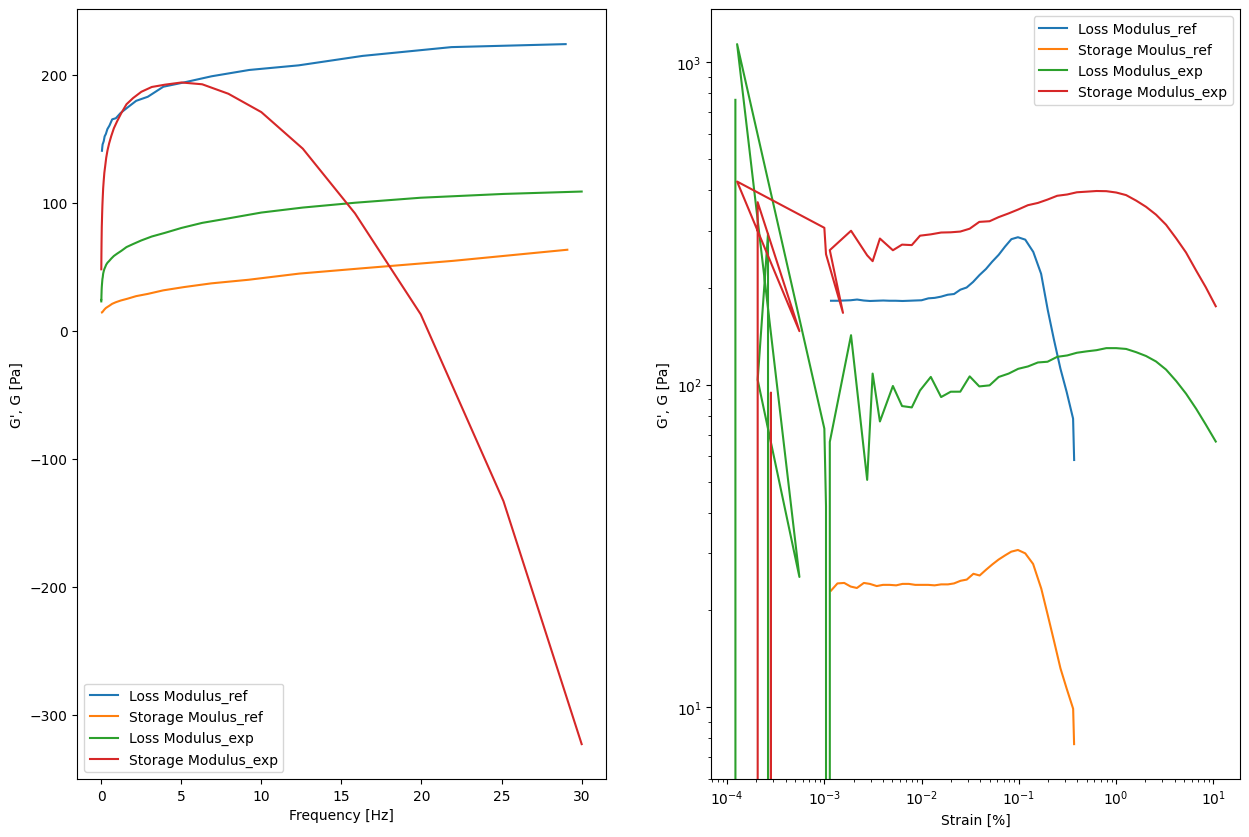

In [21]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,10))

ax1.plot(freq_L, Lf_ref, label="Loss Modulus_ref")
ax1.plot(freq_S, Sf_ref, label="Storage Moulus_ref")
ax1.plot(freq_exp, Lf_exp, label="Loss Modulus_exp")
ax1.plot(freq_exp, Sf_exp, label="Storage Modulus_exp")
ax1.set_xlabel("Frequency [Hz]")
ax1.set_ylabel("G', G [Pa]")
ax1.legend()

ax2.plot(str_L, La_ref, label="Loss Modulus_ref")
ax2.plot(str_S, Sa_ref, label="Storage Moulus_ref")
ax2.plot(strain_exp, La_exp, label="Loss Modulus_exp")
ax2.plot(strain_exp, Sa_exp, label="Storage Modulus_exp")
ax2.set_xlabel("Strain [%]")
ax2.set_ylabel("G', G [Pa]")
ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.legend()


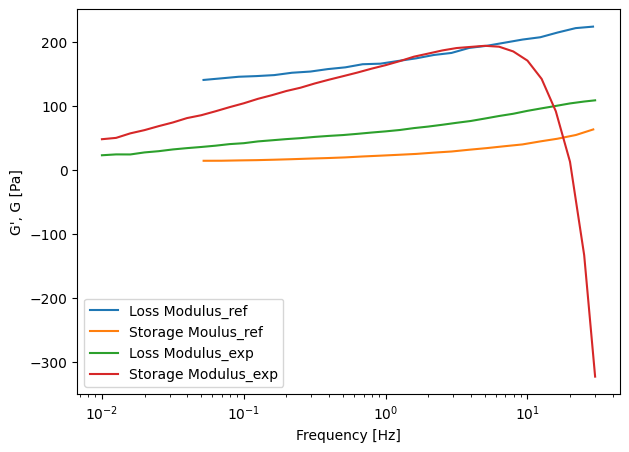

In [22]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(freq_L, Lf_ref, label="Loss Modulus_ref")
ax.plot(freq_S, Sf_ref, label="Storage Moulus_ref")
ax.plot(freq_exp, Lf_exp, label="Loss Modulus_exp")
ax.plot(freq_exp, Sf_exp, label="Storage Modulus_exp")
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("G', G [Pa]")
ax.set_xscale("log")
ax.legend()

# Time Sweep

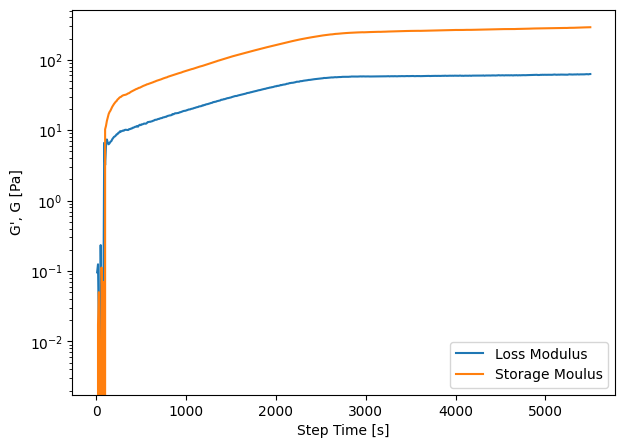

In [72]:
fig, ax = plt.subplots(1, 1, figsize=(7,5))

ax.plot(time_exp, Lt_exp, label="Loss Modulus")
ax.plot(time_exp, St_exp, label="Storage Moulus")
ax.set_xlabel("Step Time [s]")
ax.set_ylabel("G', G [Pa]")
ax.set_yscale("log")
ax.legend()